# Load data and keep 2019 timepoint

In [1]:
import pandas as pd

df_covid_AP = pd.read_csv('../lung_pollution/data/covid_pollution_clean.csv')

df_covid_AP.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1'], inplace = True)
df_covid_AP = df_covid_AP.rename(columns={"PM2.5_annualMean": "PM2_5_annualMean", "Fully vaccinated": "Fully_vaccinated", "Population density": "Population_density"})

In [2]:
df_covid_AP.shape

(4000, 23)

In [3]:
df_covid_AP.columns

Index(['county', 'year', 'NO2_annualMean', 'NO2_hrOver200', 'NO_annualMean',
       'O3_annualMean', 'O3_daysOver120', 'O3_dailyMaxAnnualMean',
       'O3_dailyHourlyMax', 'O3_daily8HrMax', 'PM10_annualMean',
       'PM10_daysOver50', 'PM2_5_annualMean', 'BL', 'EWZ', 'Shape__Area',
       'death_rate', 'cases', 'deaths', 'cases_per_100k', 'deaths_per_100k',
       'Fully_vaccinated', 'Population_density'],
      dtype='object')

In [4]:
df_covid_AP.sort_values(['year'], axis=0, ascending=False,inplace=True,ignore_index=True)
df_covid_AP_2019 = df_covid_AP[0:400]

# RobustScale features

In [5]:
df_num = df_covid_AP_2019[['NO2_annualMean', 'NO2_hrOver200', 'NO_annualMean',
       'O3_annualMean', 'O3_daysOver120', 'O3_dailyMaxAnnualMean',
       'O3_dailyHourlyMax', 'O3_daily8HrMax', 'PM10_annualMean',
       'PM10_daysOver50', 'PM2_5_annualMean', 'Fully_vaccinated', 'Population_density', 'cases_per_100k', 'deaths_per_100k'
       ]]

In [6]:
from sklearn.preprocessing import RobustScaler

r_scaler = RobustScaler()  # Instanciate Robust Scaler

r_scaler.fit(df_num)  # Fit scaler to feature
scaled_num = r_scaler.transform(df_num)  #Scale

df_num = pd.DataFrame(scaled_num, columns = df_num.columns)

df_covid_AP_2019[['NO2_annualMean', 'NO2_hrOver200', 'NO_annualMean',
       'O3_annualMean', 'O3_daysOver120', 'O3_dailyMaxAnnualMean',
       'O3_dailyHourlyMax', 'O3_daily8HrMax', 'PM10_annualMean',
       'PM10_daysOver50', 'PM2_5_annualMean', 'Fully_vaccinated', 'Population_density', 'cases_per_100k', 'deaths_per_100k'
       ]] = df_num[['NO2_annualMean', 'NO2_hrOver200', 'NO_annualMean',
       'O3_annualMean', 'O3_daysOver120', 'O3_dailyMaxAnnualMean',
       'O3_dailyHourlyMax', 'O3_daily8HrMax', 'PM10_annualMean',
       'PM10_daysOver50', 'PM2_5_annualMean', 'Fully_vaccinated', 'Population_density', 'cases_per_100k', 'deaths_per_100k'
       ]]

/Users/dorienroosen/.pyenv/versions/3.8.12/envs/lung_pollution/lib/python3.8/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [7]:
df_covid_AP_2019

county  year  NO2_annualMean  NO2_hrOver200  \
0         StädteRegion Aachen  2019       -2.203068      -0.763575   
1                 LK Diepholz  2019       -0.052210       0.194800   
2                 LK Coesfeld  2019        0.349943       0.319211   
3                   LK Passau  2019        0.028195       0.219674   
4                    LK Peine  2019        0.026144       0.219040   
..                        ...   ...             ...            ...   
395           SK Ludwigshafen  2019        1.383743      -0.763575   
396  LK Vorpommern-Greifswald  2019       -3.090594      -0.763575   
397             SK Neumünster  2019       -0.184678       0.153820   
398              LK Uckermark  2019       -0.227153       0.140679   
399      LK Aichach-Friedberg  2019        0.200655       0.273027   

     NO_annualMean  O3_annualMean  O3_daysOver120  O3_dailyMaxAnnualMean  \
0        -2.300578       2.120480        3.007296               1.298675   
1        -0.089904       0.047668        0.154966              -0.095789   
2         0.290399      -0.159157        0.019424              -0.248210   
3        -0.040813      -0.202963       -0.009285              -0.280493   
4        -0.053546       0.233382        0.276674               0.041074   
..             ...            ...             ...                    ...   
395       0.162964      -1.179986       -0.841235              -0.196633   
396      -2.246812       0.586518       -0.841235              -0.569132   
397      -0.127614       0.052874        0.158378              -0.091953   
398      -0.265927       0.252246        0.289036               0.054976   
399       0.162986      -0.053881        0.088416              -0.170627   

     O3_dailyHourlyMax  O3_daily8HrMax  ...                      BL     EWZ  \
0             8.818734        2.813240  ...     Nordrhein-Westfalen  556631   
1             0.003952        0.001518  ...           Niedersachsen  218072   
2            -0.033597       -0.082804  ...     Nordrhein-Westfalen  220712   
3            -0.041550       -0.100664  ...                  Bayern  193454   
4             0.037669        0.077233  ...           Niedersachsen  135844   
..                 ...             ...  ...                     ...     ...   
395           6.534858        9.251140  ...         Rheinland-Pfalz  172557   
396          -2.884293       -2.364550  ...  Mecklenburg-Vorpommern  235773   
397           0.004897        0.003640  ...      Schleswig-Holstein   79905   
398           0.041093        0.084924  ...             Brandenburg  118250   
399          -0.014484       -0.039884  ...                  Bayern  135024   

      Shape__Area death_rate  cases  deaths  cases_per_100k  deaths_per_100k  \
0    7.046180e+08   1.834700  33902     622        0.094656         0.033919   
1    1.989167e+09   1.279707   8752     112       -0.806295        -0.860765   
2    1.111795e+09   1.450909   7099     103       -1.151954        -0.930285   
3    1.532712e+09   2.123258  18368     390        1.571156         1.365247   
4    5.360006e+08   1.523207   6959     106       -0.325100        -0.465588   
..            ...        ...    ...     ...             ...              ...   
395  7.781020e+07   2.465243  13954     344        0.960395         1.332000   
396  3.800116e+09   2.437623  12184     297       -0.305628         0.244682   
397  7.140224e+07   0.889996   2809      25       -1.022262        -1.158162   
398  3.081478e+09   3.458038   4945     171       -0.733227         0.520865   
399  7.796361e+08   1.421619   7808     111       -0.038887        -0.403701   

     Fully_vaccinated  Population_density  
0            1.405405            1.088239  
1            0.972973           -0.169324  
2            1.405405           -0.005020  
3            0.000000           -0.138664  
4            0.972973            0.096497  
..                ...                 ...  
395          0.405405            3.727207  
396    

# Analyze distribution of features and targets

In [8]:
# keep useful features only
df_covid_AP_2019 = df_covid_AP_2019[['county', 'NO2_annualMean', 'NO2_hrOver200', 'NO_annualMean',
       'O3_annualMean', 'O3_daysOver120', 'O3_dailyMaxAnnualMean',
       'O3_dailyHourlyMax', 'O3_daily8HrMax', 'PM10_annualMean',
       'PM10_daysOver50', 'PM2_5_annualMean', 'Fully_vaccinated', 'Population_density', 'cases_per_100k', 'deaths_per_100k'
       ]]

In [9]:
#numerical features
feature_list = ['NO2_annualMean', 'NO2_hrOver200', 'NO_annualMean',
       'O3_annualMean', 'O3_daysOver120', 'O3_dailyMaxAnnualMean',
       'O3_dailyHourlyMax', 'O3_daily8HrMax', 'PM10_annualMean',
       'PM10_daysOver50', 'PM2_5_annualMean', 'Fully_vaccinated', 'Population_density']

In [10]:
target_list = ['cases_per_100k', 'deaths_per_100k']

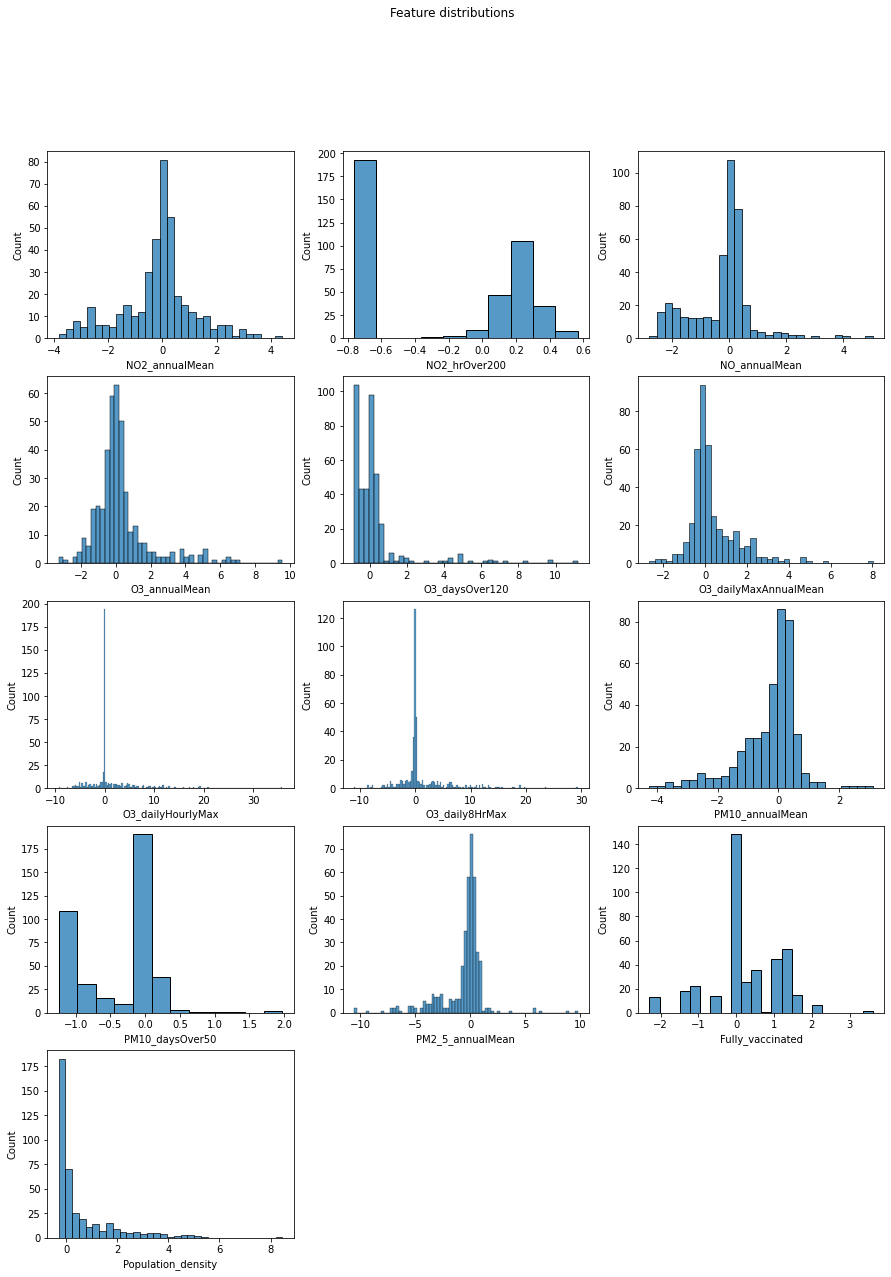

In [11]:
#check distribution of numerical features 

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,20))

for i, feature in enumerate(feature_list):
    # First subplot
    plt.subplot(5,3,i+1)
    sns.histplot(df_covid_AP_2019[feature])
    # Global figure methods
plt.suptitle('Feature distributions')
plt.show()

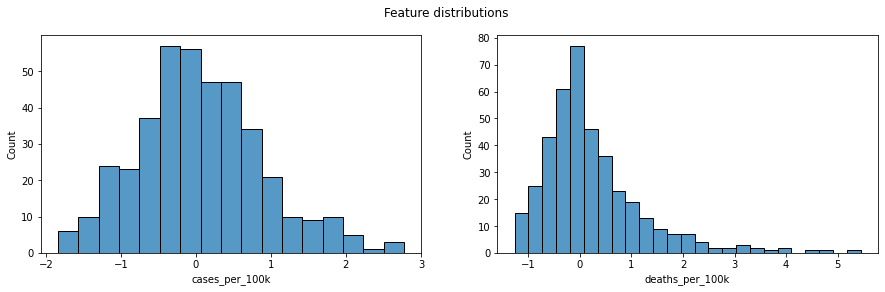

In [12]:
#check distribution of targets

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,4))

for i, feature in enumerate(target_list):
    # First subplot
    plt.subplot(1,2,i+1)
    sns.histplot(df_covid_AP_2019[feature])
    # Global figure methods
plt.suptitle('Feature distributions')
plt.show()

# Visual analysis of feature-target correlation

## Target: deaths per 100k

/Users/dorienroosen/.pyenv/versions/3.8.12/envs/lung_pollution/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/dorienroosen/.pyenv/versions/3.8.12/envs/lung_pollution/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/dorienroosen/.pyenv/versions/3.8.12/envs/lung_pollution/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data

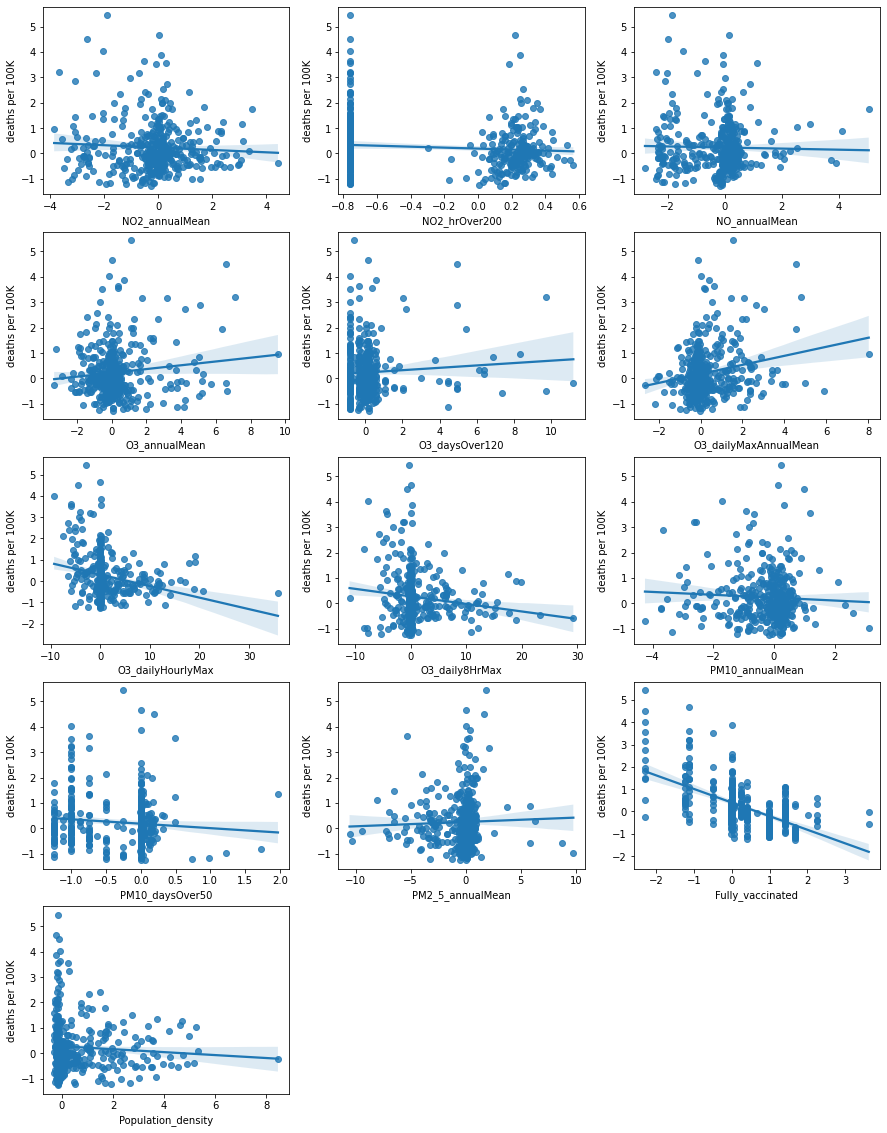

In [65]:
# First subplot
plt.figure(figsize=(15,20))

for i, feature in enumerate(feature_list):
    # First subplot
    plt.subplot(5,3,i+1)
    sns.regplot(df_covid_AP_2019[feature], df_covid_AP_2019['deaths_per_100k'])
    plt.xlabel(feature)
    plt.ylabel("deaths per 100K")
    # Global figure methods
plt.show()

## Target: cases per 100k

/Users/dorienroosen/.pyenv/versions/3.8.12/envs/lung_pollution/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/dorienroosen/.pyenv/versions/3.8.12/envs/lung_pollution/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/dorienroosen/.pyenv/versions/3.8.12/envs/lung_pollution/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data

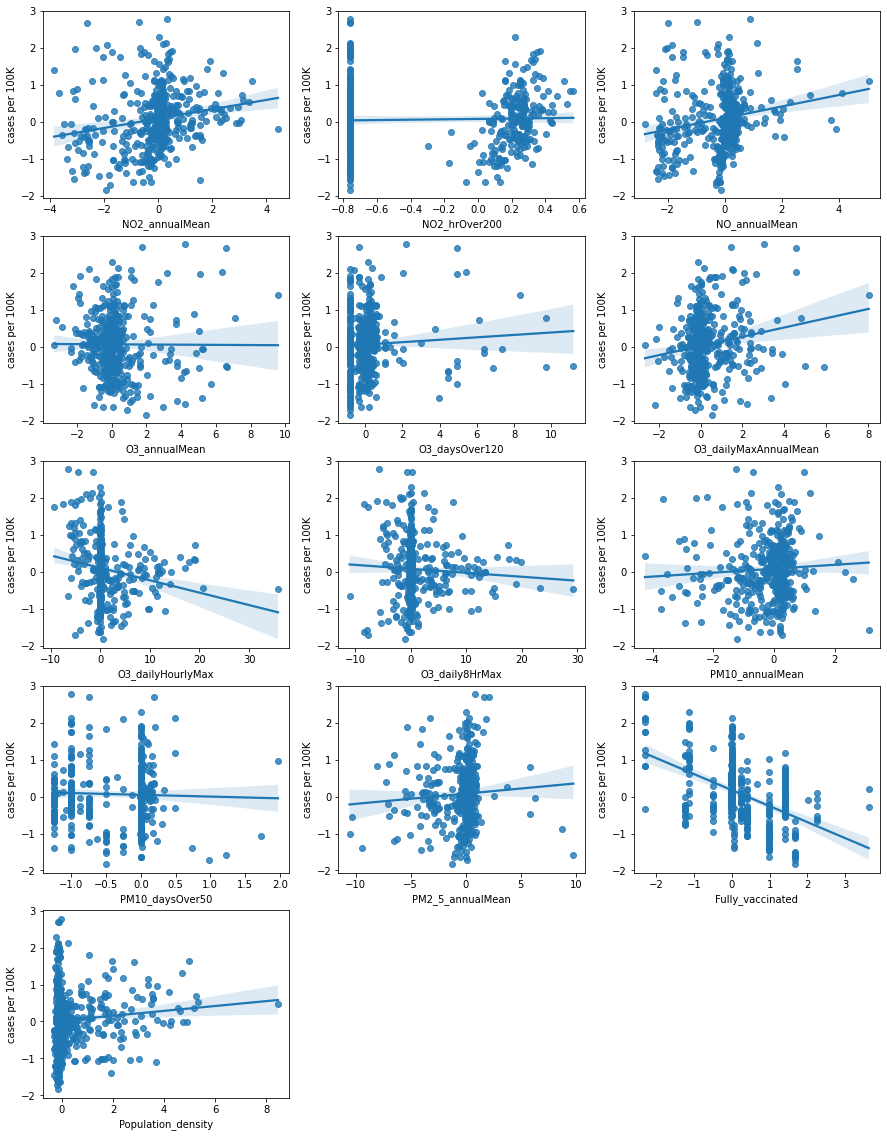

In [64]:
# First subplot
plt.figure(figsize=(15,20))

for i, feature in enumerate(feature_list):
    # First subplot
    plt.subplot(5,3,i+1)
    sns.regplot(df_covid_AP_2019[feature], df_covid_AP_2019['cases_per_100k'])
    plt.xlabel(feature)
    plt.ylabel("cases per 100K")
    # Global figure methods
plt.show()

## Correlation plot

<AxesSubplot:>

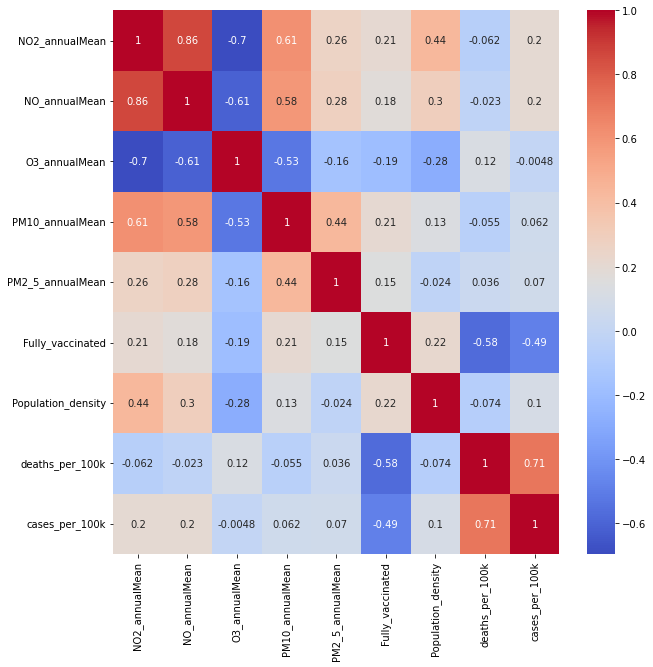

In [15]:
import seaborn as sns
plt.figure(figsize = (10,10))

sns.heatmap(df_covid_AP_2019[['NO2_annualMean', 'NO_annualMean', 'O3_annualMean', 'PM10_annualMean','PM2_5_annualMean', 'Fully_vaccinated', 'Population_density', 'deaths_per_100k', 'cases_per_100k']].corr(), 
            cmap='coolwarm', 
            annot = True, 
            annot_kws={"size": 10})

In [66]:
df_covid_AP_2019[['NO2_annualMean', 'NO_annualMean', 'O3_annualMean', 'PM10_annualMean','PM2_5_annualMean', 'Fully_vaccinated', 'Population_density', 'deaths_per_100k', 'cases_per_100k']].corr()

NO2_annualMean  NO_annualMean  O3_annualMean  \
NO2_annualMean            1.000000       0.862805      -0.696698   
NO_annualMean             0.862805       1.000000      -0.613590   
O3_annualMean            -0.696698      -0.613590       1.000000   
PM10_annualMean           0.610912       0.582500      -0.527105   
PM2_5_annualMean          0.259602       0.280446      -0.156374   
Fully_vaccinated          0.210495       0.177770      -0.188640   
Population_density        0.436260       0.295010      -0.284155   
deaths_per_100k          -0.061530      -0.023079       0.120787   
cases_per_100k            0.199826       0.200933      -0.004810   

                    PM10_annualMean  PM2_5_annualMean  Fully_vaccinated  \
NO2_annualMean             0.610912          0.259602          0.210495   
NO_annualMean              0.582500          0.280446          0.177770   
O3_annualMean             -0.527105         -0.156374         -0.188640   
PM10_annualMean            1.000000          0.436387          0.211284   
PM2_5_annualMean           0.436387          1.000000          0.148221   
Fully_vaccinated           0.211284          0.148221          1.000000   
Population_density         0.132580         -0.024332          0.222453   
deaths_per_100k           -0.055043          0.036105         -0.577165   
cases_per_100k             0.062094          0.069769         -0.491048   

                    Population_density  deaths_per_100k  cases_per_100k  
NO2_annualMean                0.436260        -0.061530        0.199826  
NO_annualMean                 0.295010        -0.023079        0.200933  
O3_annualMean                -0.284155         0.120787       -0.004810  
PM10_annualMean               0.132580        -0.055043        0.062094  
PM2_5_annualMean             -0.024332         0.036105        0.069769  
Fully_vaccinated              0.222453        -0.577165       -0.491048  
Population_density            1.000000        -0.073573        0.100248  
deaths_per_100k              -0.073573         1.000000        0.713354  
cases_per_100k                0.100248         0.713354        1.000000

## VIF analysis

In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [69]:
vif(df_covid_AP_2019[['NO2_annualMean', 'NO_annualMean', 'O3_annualMean', 'PM10_annualMean','PM2_5_annualMean', 'Fully_vaccinated', 'Population_density', 'deaths_per_100k', 'cases_per_100k']], 0)

6.023224546375797

In [71]:
df = df_covid_AP_2019[['NO2_annualMean', 'NO_annualMean', 'O3_annualMean', 'PM10_annualMean','PM2_5_annualMean', 'Fully_vaccinated', 'Population_density', 'deaths_per_100k', 'cases_per_100k']]

from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = lm.model.exog
vif = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif 

NameError: name 'NO2_annualMean' is not defined

# OLS: deaths per 100k

## Univariate linear regression

In [16]:
import statsmodels.formula.api as smf

### Vaccination status

In [17]:
model = smf.ols(formula = 'deaths_per_100k ~ Fully_vaccinated', data = df_covid_AP_2019).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        deaths_per_100k   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     198.8
Date:                Thu, 25 Nov 2021   Prob (F-statistic):           6.67e-37
Time:                        15:52:47   Log-Likelihood:                -487.24
No. Observations:                 400   AIC:                             978.5
Df Residuals:                     398   BIC:                             986.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.3971      0.042      9.345      0.000       0.314       0.481
Fully_vaccinated    -0.6099      0.043    -14.100      0.000      -0.695      -0.525
==============================================================================
Omnibus:                       93.260   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              207.962
Skew:                           1.190   Prob(JB):                     6.94e-46
Kurtosis:                       5.611   Cond. No.                         1.31
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
import numpy as np
RMSE = np.sqrt((model.resid**2).mean())
RMSE

0.8180470229308339

### Population density

In [19]:
model = smf.ols(formula = 'deaths_per_100k ~ Population_density', data = df_covid_AP_2019).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        deaths_per_100k   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     2.166
Date:                Thu, 25 Nov 2021   Prob (F-statistic):              0.142
Time:                        15:52:47   Log-Likelihood:                -567.18
No. Observations:                 400   AIC:                             1138.
Df Residuals:                     398   BIC:                             1146.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.2752      0.055      4.961      0.000       0.166       0.384
Population_density    -0.0580      0.039     -1.472      0.142      -0.135       0.019
==============================================================================
Omnibus:                      147.676   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              483.709
Skew:                           1.697   Prob(JB):                    9.20e-106
Kurtosis:                       7.183   Cond. No.                         1.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
RMSE = np.sqrt((model.resid**2).mean())
RMSE

0.9990231363697876

### NO2

In [21]:
model = smf.ols(formula = 'deaths_per_100k ~ NO2_annualMean', data = df_covid_AP_2019).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        deaths_per_100k   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.513
Date:                Thu, 25 Nov 2021   Prob (F-statistic):              0.219
Time:                        15:52:47   Log-Likelihood:                -567.51
No. Observations:                 400   AIC:                             1139.
Df Residuals:                     398   BIC:                             1147.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.2323      0.051      4.600      0.000       0.133       0.332
NO2_annualMean    -0.0467      0.038     -1.230      0.219      -0.121       0.028
==============================================================================
Omnibus:                      146.022   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              474.285
Skew:                           1.680   Prob(JB):                    1.02e-103
Kurtosis:                       7.143   Cond. No.                         1.37
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
RMSE = np.sqrt((model.resid**2).mean())
RMSE

0.9998399120304602

### NO 

In [23]:
model = smf.ols(formula = 'deaths_per_100k ~ NO_annualMean', data = df_covid_AP_2019).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        deaths_per_100k   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.2121
Date:                Thu, 25 Nov 2021   Prob (F-statistic):              0.645
Time:                        15:52:47   Log-Likelihood:                -568.16
No. Observations:                 400   AIC:                             1140.
Df Residuals:                     398   BIC:                             1148.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.2348      0.051      4.560      0.000       0.134       0.336
NO_annualMean    -0.0214      0.046     -0.461      0.645      -0.113       0.070
==============================================================================
Omnibus:                      150.597   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              505.003
Skew:                           1.724   Prob(JB):                    2.19e-110
Kurtosis:                       7.291   Cond. No.                         1.28
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
RMSE = np.sqrt((model.resid**2).mean())
RMSE

1.0014711804123115

### Ozon

In [25]:
model = smf.ols(formula = 'deaths_per_100k ~ O3_annualMean', data = df_covid_AP_2019).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        deaths_per_100k   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     5.893
Date:                Thu, 25 Nov 2021   Prob (F-statistic):             0.0156
Time:                        15:52:47   Log-Likelihood:                -565.33
No. Observations:                 400   AIC:                             1135.
Df Residuals:                     398   BIC:                             1143.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.2188      0.051      4.322      0.000       0.119       0.318
O3_annualMean     0.0747      0.031      2.427      0.016       0.014       0.135
==============================================================================
Omnibus:                      141.073   Durbin-Watson:                   2.112
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              447.758
Skew:                           1.627   Prob(JB):                     5.90e-98
Kurtosis:                       7.034   Cond. No.                         1.70
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
RMSE = np.sqrt((model.resid**2).mean())
RMSE

0.9944036748745454

### PM2.5

In [27]:
model = smf.ols(formula = 'deaths_per_100k ~ PM2_5_annualMean', data = df_covid_AP_2019).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        deaths_per_100k   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.5195
Date:                Thu, 25 Nov 2021   Prob (F-statistic):              0.471
Time:                        15:52:47   Log-Likelihood:                -568.01
No. Observations:                 400   AIC:                             1140.
Df Residuals:                     398   BIC:                             1148.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.2499      0.052      4.806      0.000       0.148       0.352
PM2_5_annualMean     0.0171      0.024      0.721      0.471      -0.030       0.064
==============================================================================
Omnibus:                      150.330   Durbin-Watson:                   2.116
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              503.425
Skew:                           1.721   Prob(JB):                    4.81e-110
Kurtosis:                       7.285   Cond. No.                         2.31
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
RMSE = np.sqrt((model.resid**2).mean())
RMSE

1.0010848709133817

### PM10

In [29]:
model = smf.ols(formula = 'deaths_per_100k ~ PM10_annualMean', data = df_covid_AP_2019).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        deaths_per_100k   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.210
Date:                Thu, 25 Nov 2021   Prob (F-statistic):              0.272
Time:                        15:52:47   Log-Likelihood:                -567.66
No. Observations:                 400   AIC:                             1139.
Df Residuals:                     398   BIC:                             1147.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.2240      0.052      4.287      0.000       0.121       0.327
PM10_annualMean    -0.0564      0.051     -1.100      0.272      -0.157       0.044
==============================================================================
Omnibus:                      152.501   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              525.876
Skew:                           1.734   Prob(JB):                    6.42e-115
Kurtosis:                       7.418   Cond. No.                         1.34
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
RMSE = np.sqrt((model.resid**2).mean())
RMSE

1.000219336166327

## Multivariate linear regression

In [72]:
model = smf.ols(formula = 'deaths_per_100k ~ NO2_annualMean + NO_annualMean + O3_annualMean + PM10_annualMean + PM2_5_annualMean + Fully_vaccinated + Population_density', data = df_covid_AP_2019).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        deaths_per_100k   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     31.51
Date:                Thu, 25 Nov 2021   Prob (F-statistic):           1.32e-34
Time:                        16:14:46   Log-Likelihood:                -478.99
No. Observations:                 400   AIC:                             974.0
Df Residuals:                     392   BIC:                             1006.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.4116      0.049      8.329      0.000       0.314       0.509
NO2_annualMean        -0.0228      0.073     -0.311      0.756      -0.167       0.121
NO_annualMean          0.0983      0.076      1.295      0.196      -0.051       0.248
O3_annualMean          0.0627      0.036      1.758      0.080      -0.007       0.133
PM10_annualMean        0.0263      0.058      0.452      0.652      -0.088       0.141
PM2_5_annualMean       0.0526      0.022      2.425      0.016       0.010       0.095
Fully_vaccinated      -0.6428      0.045    -14.346      0.000      -0.731      -0.555
Population_density     0.0565      0.037      1.517      0.130      -0.017       0.130
==============================================================================
Omnibus:                       91.540   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              215.404
Skew:                           1.144   Prob(JB):                     1.68e-47
Kurtosis:                       5.773   Cond. No.                         6.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
RMSE = np.sqrt((model.resid**2).mean())
RMSE

0.8013431616309021

# OLS: cases per 100k

## Univariate linear regression

### Vaccination status

In [33]:
model = smf.ols(formula = 'cases_per_100k ~ Fully_vaccinated', data = df_covid_AP_2019).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         cases_per_100k   R-squared:                       0.241
Model:                            OLS   Adj. R-squared:                  0.239
Method:                 Least Squares   F-statistic:                     126.5
Date:                Thu, 25 Nov 2021   Prob (F-statistic):           1.15e-25
Time:                        15:52:47   Log-Likelihood:                -441.09
No. Observations:                 400   AIC:                             886.2
Df Residuals:                     398   BIC:                             894.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.1749      0.038      4.619      0.000       0.100       0.249
Fully_vaccinated    -0.4334      0.039    -11.246      0.000      -0.509      -0.358
==============================================================================
Omnibus:                        9.286   Durbin-Watson:                   1.865
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                6.798
Skew:                           0.203   Prob(JB):                       0.0334
Kurtosis:                       2.507   Cond. No.                         1.31
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
RMSE = np.sqrt((model.resid**2).mean())
RMSE

0.7289095065444727

### Population density

In [35]:
model = smf.ols(formula = 'cases_per_100k ~ Population_density', data = df_covid_AP_2019).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         cases_per_100k   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     4.040
Date:                Thu, 25 Nov 2021   Prob (F-statistic):             0.0451
Time:                        15:52:47   Log-Likelihood:                -494.26
No. Observations:                 400   AIC:                             992.5
Df Residuals:                     398   BIC:                             1000.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.0233      0.046      0.505      0.614      -0.068       0.114
Population_density     0.0660      0.033      2.010      0.045       0.001       0.131
==============================================================================
Omnibus:                       19.867   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.482
Skew:                           0.532   Prob(JB):                     2.16e-05
Kurtosis:                       3.397   Cond. No.                         1.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
RMSE = np.sqrt((model.resid**2).mean())
RMSE

0.8325225709089548

### NO2

In [37]:
model = smf.ols(formula = 'cases_per_100k ~ NO2_annualMean', data = df_covid_AP_2019).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         cases_per_100k   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     16.55
Date:                Thu, 25 Nov 2021   Prob (F-statistic):           5.71e-05
Time:                        15:52:47   Log-Likelihood:                -488.13
No. Observations:                 400   AIC:                             980.3
Df Residuals:                     398   BIC:                             988.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.0844      0.041      2.037      0.042       0.003       0.166
NO2_annualMean     0.1267      0.031      4.069      0.000       0.065       0.188
==============================================================================
Omnibus:                       32.343   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.625
Skew:                           0.684   Prob(JB):                     4.10e-09
Kurtosis:                       3.669   Cond. No.                         1.37
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
RMSE = np.sqrt((model.resid**2).mean())
RMSE

0.819861836471156

### NO 

In [39]:
model = smf.ols(formula = 'cases_per_100k ~ NO_annualMean', data = df_covid_AP_2019).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         cases_per_100k   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     16.74
Date:                Thu, 25 Nov 2021   Prob (F-statistic):           5.18e-05
Time:                        15:52:47   Log-Likelihood:                -488.04
No. Observations:                 400   AIC:                             980.1
Df Residuals:                     398   BIC:                             988.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.1017      0.042      2.414      0.016       0.019       0.185
NO_annualMean     0.1556      0.038      4.092      0.000       0.081       0.230
==============================================================================
Omnibus:                       28.026   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.628
Skew:                           0.625   Prob(JB):                     8.22e-08
Kurtosis:                       3.630   Cond. No.                         1.28
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
RMSE = np.sqrt((model.resid**2).mean())
RMSE

0.8196723460155986

### Ozon

In [41]:
model = smf.ols(formula = 'cases_per_100k ~ O3_annualMean', data = df_covid_AP_2019).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         cases_per_100k   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                  0.009209
Date:                Thu, 25 Nov 2021   Prob (F-statistic):              0.924
Time:                        15:52:47   Log-Likelihood:                -496.27
No. Observations:                 400   AIC:                             996.5
Df Residuals:                     398   BIC:                             1005.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0640      0.043      1.503      0.134      -0.020       0.148
O3_annualMean    -0.0025      0.026     -0.096      0.924      -0.053       0.048
==============================================================================
Omnibus:                       14.642   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.206
Skew:                           0.458   Prob(JB):                     0.000499
Kurtosis:                       3.268   Cond. No.                         1.70
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
RMSE = np.sqrt((model.resid**2).mean())
RMSE

0.836727980915822

### PM2.5

In [43]:
model = smf.ols(formula = 'cases_per_100k ~ PM2_5_annualMean', data = df_covid_AP_2019).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         cases_per_100k   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.947
Date:                Thu, 25 Nov 2021   Prob (F-statistic):              0.164
Time:                        15:52:47   Log-Likelihood:                -495.30
No. Observations:                 400   AIC:                             994.6
Df Residuals:                     398   BIC:                             1003.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.0792      0.043      1.826      0.069      -0.006       0.164
PM2_5_annualMean     0.0277      0.020      1.395      0.164      -0.011       0.067
==============================================================================
Omnibus:                       13.223   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               13.595
Skew:                           0.437   Prob(JB):                      0.00112
Kurtosis:                       3.230   Cond. No.                         2.31
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
RMSE = np.sqrt((model.resid**2).mean())
RMSE

0.8346986783678119

### PM10

In [45]:
model = smf.ols(formula = 'cases_per_100k ~ PM10_annualMean', data = df_covid_AP_2019).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         cases_per_100k   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.540
Date:                Thu, 25 Nov 2021   Prob (F-statistic):              0.215
Time:                        15:52:47   Log-Likelihood:                -495.50
No. Observations:                 400   AIC:                             995.0
Df Residuals:                     398   BIC:                             1003.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.0785      0.044      1.800      0.073      -0.007       0.164
PM10_annualMean     0.0532      0.043      1.241      0.215      -0.031       0.137
==============================================================================
Omnibus:                       15.420   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.121
Skew:                           0.465   Prob(JB):                     0.000316
Kurtosis:                       3.317   Cond. No.                         1.34
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
RMSE = np.sqrt((model.resid**2).mean())
RMSE

0.8351230200768954

## Multivariate linear regression

In [73]:
model = smf.ols(formula = 'cases_per_100k ~ NO2_annualMean + NO_annualMean + O3_annualMean + PM10_annualMean + PM2_5_annualMean + Fully_vaccinated + Population_density', data = df_covid_AP_2019).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         cases_per_100k   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     34.50
Date:                Thu, 25 Nov 2021   Prob (F-statistic):           2.12e-37
Time:                        16:14:54   Log-Likelihood:                -400.29
No. Observations:                 400   AIC:                             816.6
Df Residuals:                     392   BIC:                             848.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.1832      0.041      4.515      0.000       0.103       0.263
NO2_annualMean         0.1725      0.060      2.866      0.004       0.054       0.291
NO_annualMean          0.1067      0.062      1.711      0.088      -0.016       0.229
O3_annualMean          0.1070      0.029      3.650      0.000       0.049       0.165
PM10_annualMean       -0.0071      0.048     -0.149      0.882      -0.101       0.087
PM2_5_annualMean       0.0336      0.018      1.886      0.060      -0.001       0.069
Fully_vaccinated      -0.5062      0.037    -13.755      0.000      -0.579      -0.434
Population_density     0.0859      0.031      2.809      0.005       0.026       0.146
==============================================================================
Omnibus:                       10.789   Durbin-Watson:                   1.868
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               10.895
Skew:                           0.393   Prob(JB):                      0.00431
Kurtosis:                       3.192   Cond. No.                         6.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
model = smf.ols(formula = 'cases_per_100k ~ NO2_annualMean + NO2_hrOver200 + NO_annualMean + O3_annualMean + O3_daysOver120 + O3_dailyMaxAnnualMean + O3_dailyHourlyMax + O3_daily8HrMax + PM10_annualMean + PM10_daysOver50 + PM2_5_annualMean + Fully_vaccinated + Population_density', data = df_covid_AP_2019).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         cases_per_100k   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     24.33
Date:                Thu, 25 Nov 2021   Prob (F-statistic):           1.25e-42
Time:                        15:52:48   Log-Likelihood:                -376.58
No. Observations:                 400   AIC:                             781.2
Df Residuals:                     386   BIC:                             837.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.1542      0.044      3.532      0.000       0.068       0.240
NO2_annualMean            0.1644      0.066      2.473      0.014       0.034       0.295
NO2_hrOver200             0.0819      0.096      0.856      0.392      -0.106       0.270
NO_annualMean             0.0659      0.065      1.008      0.314      -0.063       0.194
O3_annualMean            -0.0651      0.049     -1.317      0.188      -0.162       0.032
O3_daysOver120            0.0700      0.037      1.886      0.060      -0.003       0.143
O3_dailyMaxAnnualMean     0.2177      0.051      4.239      0.000       0.117       0.319
O3_dailyHourlyMax        -0.0698      0.020     -3.517      0.000      -0.109      -0.031
O3_daily8HrMax            0.0361      0.021      1.750      0.081      -0.004       0.077
PM10_annualMean           0.0102      0.068      0.151      0.880      -0.123       0.143
PM10_daysOver50          -0.0220      0.108     -0.203      0.839      -0.235       0.191
PM2_5_annualMean          0.0422      0.017      2.430      0.016       0.008       0.076
Fully_vaccinated         -0.4145      0.039    -10.733      0.000      -0.490      -0.339
Population_density        0.1063      0.030      3.534      0.000       0.047       0.165
==============================================================================
Omnibus:                        7.006   Durbin-Watson:                   1.838
Prob(Omnibus):                  0.030   Jarque-Bera (JB):                6.889
Skew:                           0.316   Prob(JB):                       0.0319
Kurtosis:                       3.116   Cond. No.                         27.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

df = pd.DataFrame()
df["vif_index"] = [vif(X.values, i) for i in range(X.shape[1])]
df["features"] = X.columns
df

vif_index            features
0   5.803394      NO2_annualMean
1   4.284519       NO_annualMean
2   2.086602       O3_annualMean
3   2.136186     PM10_annualMean
4   1.355404    PM2_5_annualMean
5   1.129409    Fully_vaccinated
6   1.441051  Population_density

In [49]:
RMSE = np.sqrt((model.resid**2).mean())
RMSE

0.620346365222002

# Feature and target definition

In [50]:
X = df_covid_AP_2019[['NO2_annualMean', 'NO_annualMean', 'O3_annualMean', 'PM10_annualMean','PM2_5_annualMean', 'Fully_vaccinated', 'Population_density']]
y_mort = df_covid_AP_2019[['deaths_per_100k']]
y_cases = df_covid_AP_2019[['cases_per_100k']]

# Linear Regression

In [51]:
from sklearn.linear_model import LinearRegression

## Deaths per 100k

In [52]:
linreg = LinearRegression().fit(X,y_mort)
linreg.score(X, y_mort)

0.3600754417489197

## Cases per 100k

In [53]:
linreg = LinearRegression().fit(X,y_cases)
linreg.score(X, y_cases)

0.3811886705355193

# Lasso, Ridge, LinReg, ElasticNet

## Cases per 100k

In [95]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression, ElasticNet

linreg = LinearRegression().fit(X, y_cases)
ridge = Ridge().fit(X, y_cases)
lasso = Lasso().fit(X, y_cases)
elastic = ElasticNet(alpha=0.2).fit(X, y_cases)

coefs = pd.DataFrame({
    "coef_linreg": pd.Series(linreg.coef_[0], index = X.columns),
    "coef_ridge": pd.Series(ridge.coef_[0], index = X.columns),
    "coef_lasso": pd.Series(lasso.coef_[0], index= X.columns),
    "coef_elastic": pd.Series(elastic.coef_[0], index= X.columns)})\

# coefs\
#     .applymap(lambda x: int(x))\
#     .style.applymap(lambda x: 'color: red' if x == 0 else 'color: black')

print('R2 LinReg: ', linreg.score(X,y_cases))
print('R2 Ridge: ', ridge.score(X,y_cases))
print('R2 Lasso: ', lasso.score(X,y_cases))
print('R2 Elastic: ', elastic.score(X,y_cases))

#pd.Series(linreg.coef_[0], index = X.columns)
coefs

R2 LinReg:  0.3811886705355193
R2 Ridge:  0.3811851922030539
R2 Lasso:  0.0
R2 Elastic:  0.29642881611346916


coef_linreg  coef_ridge  coef_lasso  coef_elastic
NO2_annualMean         0.172545    0.171792         0.0      0.100102
NO_annualMean          0.106680    0.106736         0.0      0.100102
O3_annualMean          0.107018    0.106641         0.0      0.100102
PM10_annualMean       -0.007136   -0.007082         0.0      0.100102
PM2_5_annualMean       0.033585    0.033517         0.0      0.100102
Fully_vaccinated      -0.506250   -0.504685         0.0      0.100102
Population_density     0.085922    0.085711         0.0      0.100102

## Deaths per 100k

In [96]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression, ElasticNet

linreg = LinearRegression().fit(X, y_mort)
ridge = Ridge().fit(X, y_mort)
lasso = Lasso().fit(X, y_mort)
elastic = ElasticNet(alpha=0.2).fit(X, y_mort)

coefs = pd.DataFrame({
    "coef_linreg": pd.Series(linreg.coef_[0], index = X.columns),
    "coef_ridge": pd.Series(ridge.coef_[0], index = X.columns),
    "coef_lasso": pd.Series(lasso.coef_[0], index= X.columns),
    "coef_elastic": pd.Series(elastic.coef_[0], index= X.columns)})\

# coefs\
#     .applymap(lambda x: int(x))\
#     .style.applymap(lambda x: 'color: red' if x == 0 else 'color: black')

print('R2 LinReg: ', linreg.score(X,y_cases))
print('R2 Ridge: ', ridge.score(X,y_cases))
print('R2 Lasso: ', lasso.score(X,y_cases))
print('R2 Elastic: ', elastic.score(X,y_cases))

#pd.Series(linreg.coef_[0], index = X.columns)
coefs

R2 LinReg:  0.22954640195435239
R2 Ridge:  0.23017277625939314
R2 Lasso:  -0.04463629016757786
R2 Elastic:  0.2101019739333766


coef_linreg  coef_ridge  coef_lasso  coef_elastic
NO2_annualMean        -0.022786   -0.021943        -0.0           0.0
NO_annualMean          0.098306    0.097302        -0.0           0.0
O3_annualMean          0.062746    0.062720        -0.0           0.0
PM10_annualMean        0.026340    0.025967        -0.0           0.0
PM2_5_annualMean       0.052562    0.052472        -0.0           0.0
Fully_vaccinated      -0.642819   -0.640822        -0.0           0.0
Population_density     0.056506    0.055983        -0.0           0.0

# KNN

## Cases per 100k

In [54]:
from sklearn.neighbors import KNeighborsRegressor

# Instanciate model
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X, y_cases)
neigh.score(X, y_cases)

0.7892056006784937

## Deaths per 100k

In [55]:
# Instanciate model
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X, y_mort)
neigh.score(X, y_mort)

0.7309186858567673

# Radius Neighbors Regressor

In [56]:
from sklearn.neighbors import RadiusNeighborsRegressor

## Deaths per 100k

In [57]:
RadNeigh = RadiusNeighborsRegressor(radius=1.0).fit(X,y_mort)
RadNeigh.score(X,y_mort)

0.7628928774847563

## Cases per 100k

In [58]:
RadNeigh = RadiusNeighborsRegressor(radius=1.0).fit(X,y_cases)
RadNeigh.score(X,y_cases)

0.755605009604216

# Support Vector Regression

## deaths per 100k

In [59]:
from sklearn.svm import SVR

SVR = SVR()
SVR.fit(X,y_mort)
SVR.score(X,y_mort)


/Users/dorienroosen/.pyenv/versions/3.8.12/envs/lung_pollution/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.4897788825186674

## cases per 100k

In [60]:
from sklearn.svm import SVR

# Instanciate model
SVR = SVR()
SVR.fit(X,y_cases)
SVR.score(X,y_cases)

/Users/dorienroosen/.pyenv/versions/3.8.12/envs/lung_pollution/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5402629328825224

# AdaBoost, RandomForestRegressor, XGBoost


## Cases per 100k

In [104]:
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
#from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

adaboost = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=3),
    n_estimators=50)
forest = RandomForestRegressor(n_estimators=100)
#xgbreg = XGBRegressor(max_depth=10, n_estimators=100, learning_rate=0.1)

adaboost.fit(X,y_cases)
forest.fit(X,y_cases)

print('R2 adaboost: ', adaboost.score(X,y_cases))
print('R2 RandomForest: ', forest.score(X,y_cases))
#print('R2 XGBoost: ', xgbreg.score(X,y_cases))


/Users/dorienroosen/.pyenv/versions/3.8.12/envs/lung_pollution/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/var/folders/py/ydbm54f573b1ymf9x65hf0mm0000gn/T/ipykernel_76825/3975053775.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X,y_cases)


R2 adaboost:  0.5857344806106521
R2 RandomForest:  0.9359541453685544


## Deaths per 100k

In [105]:
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
#from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

adaboost = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=3),
    n_estimators=50)
forest = RandomForestRegressor(n_estimators=100)
#xgbreg = XGBRegressor(max_depth=10, n_estimators=100, learning_rate=0.1)

adaboost.fit(X,y_mort)
forest.fit(X,y_mort)

print('R2 adaboost: ', adaboost.score(X,y_mort))
print('R2 RandomForest: ', forest.score(X,y_mort))
#print('R2 XGBoost: ', xgbreg.score(X,y_cases))

/Users/dorienroosen/.pyenv/versions/3.8.12/envs/lung_pollution/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/var/folders/py/ydbm54f573b1ymf9x65hf0mm0000gn/T/ipykernel_76825/695659583.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X,y_mort)


R2 adaboost:  0.5719168629797899
R2 RandomForest:  0.9113708704674639


# Feature permutations